In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

def reduce(i, t):
    i1 = i[0]
    i2 = i[-1]
    i_n = np.geomspace(i1,i2,num=50)
    i_n_nd = np.tile(i_n, (len(i), 1))
    i_nd = np.tile(i, (len(i_n), 1)).T
    idx = (np.abs(i_n_nd - i_nd)).argmin(axis=0)
    return i[idx], t[idx]

In [3]:
ratings = [2,4,6,10,16,20,25,32,40,50,63,80,100,125,160,200,250,315,400,500,630,800,1000,1250]
curves = {}
for rating in ratings:
    filename = 'points_DIN_' + str(rating) +'.json'
    with open(filename) as fp:
        dict_in = json.load(fp)
    pnt_data = dict_in['GetCurvesResult'][0]['Points']
    i = np.array([row['X'] for row in pnt_data])/rating
    t = np.array([row['Y'] for row in pnt_data])

    points_n = np.argwhere(i == np.min(i))[0,0]
    i_l = i[1:points_n+1][::-1]
    t_l = t[1:points_n+1][::-1]
    i_u = i[points_n+2:]
    t_u = t[points_n+2:]

    i_u, t_u = reduce(i_u, t_u)
    i_l, t_l = reduce(i_l, t_l)
    curves_out = np.column_stack((i_u,t_u,i_l,t_l))
    curves[rating] = curves_out
    np.savetxt('out/'+str(rating)+'_2.csv', curves[rating], delimiter=',')
    curves[rating] = curves_out


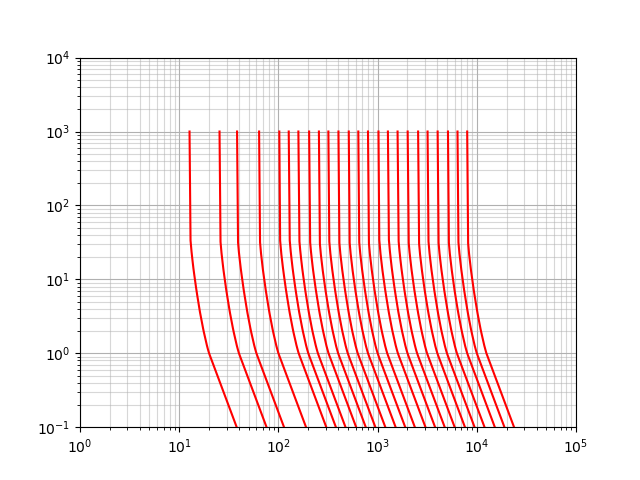

In [5]:
%matplotlib widget

for rating in ratings:
    i1 = curves[rating][:,0]
    t1 = curves[rating][:,1]
    i2 = curves[rating][:,2]
    t2 = curves[rating][:,3]
    plt.plot(rating*i1, t1, 'r-', label=('d'+str(rating)))
#     plt.plot(rating*i2, t2, 'b-', label=('d'+str(rating)))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1,100000)
    plt.ylim(0.1,1e4)
    plt.grid(True, which='major', alpha=1)
    plt.grid(True, which='minor', alpha=0.5)

#     plt.legend()